In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import font_manager, rc

In [2]:
sns.set(rc={'figure.figsize':(10, 10)})

In [3]:
rc('font', family='gulim')#Windows

In [4]:
# predicted_result = pd.read_csv('./predicted_result.csv', index_col=0)
joined_test_data = pd.read_csv('./joined_test_data.csv', index_col=0)

In [5]:
# df = predicted_result[predicted_result['predicted_is_applied'] == 1]
df = joined_test_data[joined_test_data['is_applied'] == 1]
df

,user_id,bank_id,product_id,loan_limit,loan_rate,insert_weekday,age,age_group,gender,credit_score,...,event3,event4,event5,event6,event7,event8,event9,event10,event11,is_applied
3,545882,54,235,7000000.0,16.5,3,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
5,545882,23,236,21000000.0,15.5,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
6,545882,23,108,21000000.0,16.1,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
11,545882,38,223,10000000.0,17.4,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
12,545882,17,19,10000000.0,16.4,1,46.0,40.0,1.0,580.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875655,818151,1,61,12000000.0,15.4,0,50.0,50.0,1.0,630.0,...,2.0,2.0,3.0,2.0,5.0,2.0,0.0,0.0,3.0,1.0
9875656,43054,6,36,14000000.0,18.4,0,33.0,30.0,1.0,570.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
9875657,508855,29,75,18000000.0,9.4,0,31.0,30.0,0.0,610.0,...,0.0,6.0,8.0,3.0,17.0,5.0,0.0,0.0,6.0,1.0
9875658,508855,29,75,18000000.0,9.4,0,31.0,30.0,0.0,610.0,...,0.0,6.0,8.0,3.0,17.0,5.0,0.0,0.0,6.0,1.0


In [6]:
df.columns

Index(['user_id', 'bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'insert_weekday', 'age', 'age_group', 'gender', 'credit_score',
       'yearly_income', 'income_type', 'years_of_service', 'months_of_service',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'event1', 'event2', 'event3',
       'event4', 'event5', 'event6', 'event7', 'event8', 'event9', 'event10',
       'event11', 'is_applied'],
      dtype='object')

In [9]:
credit_grade_bins = [0, 335, 454, 530, 630, 698, 768, 832, 891, 942, 1001]
# credit_grade_group_names = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
credit_grade_group_names = ['10등급', '9등급', '8등급', '7등급', '6등급', '5등급', '4등급', '3등급', '2등급', '1등급']

credit_grade_result = pd.cut(df['credit_score'], credit_grade_bins, right = False, labels = credit_grade_group_names)
credit_grade_result = pd.DataFrame(credit_grade_result)
credit_grade_result.columns = ['credit_grade']
credit_grade_result

,credit_grade
3,7등급
5,7등급
6,7등급
11,7등급
12,7등급
...,...
9875655,6등급
9875656,7등급
9875657,7등급
9875658,7등급


<AxesSubplot: xlabel='credit_grade', ylabel='count'>

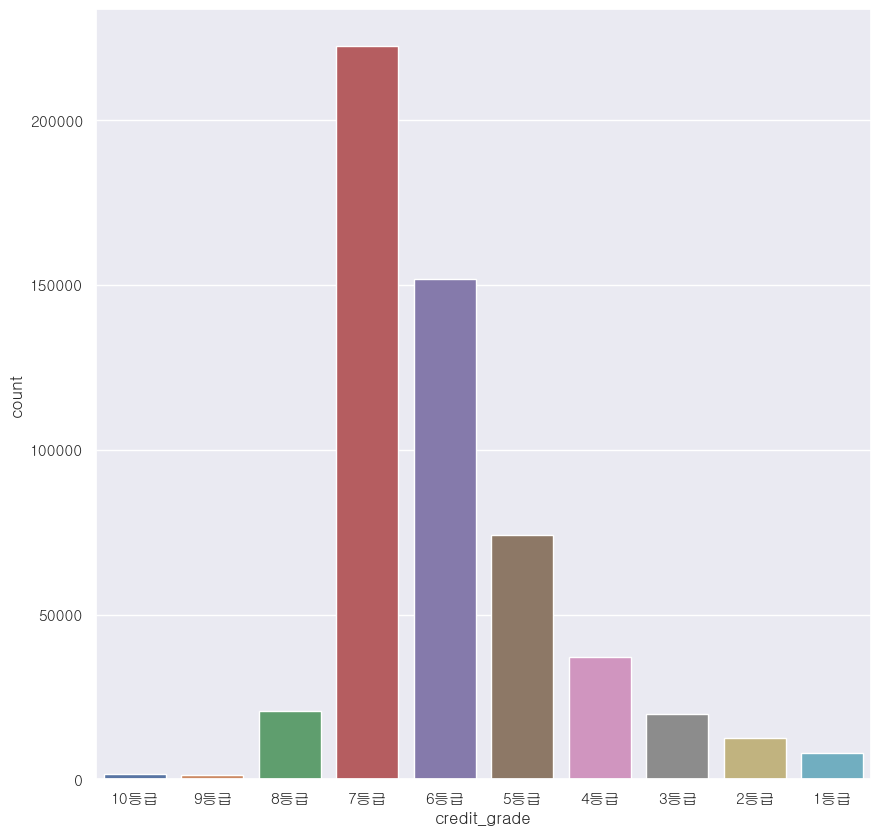

In [10]:
sns.countplot(data = credit_grade_result, x='credit_grade')

In [7]:
credit_group_bins = [0, 630, 832, 1001]
# credit_group_group_names = [3, 2, 1]
credit_group_group_names = ['저 신용자', '보통 신용자', '우량 신용자']

credit_group_result = pd.cut(df['credit_score'], credit_group_bins, right = False, labels = credit_group_group_names)
credit_group_result = pd.DataFrame(credit_group_result)
credit_group_result.columns = ['credit_group']
credit_group_result

,credit_group
3,저 신용자
5,저 신용자
6,저 신용자
11,저 신용자
12,저 신용자
...,...
9875655,보통 신용자
9875656,저 신용자
9875657,저 신용자
9875658,저 신용자


<AxesSubplot: xlabel='credit_group', ylabel='count'>

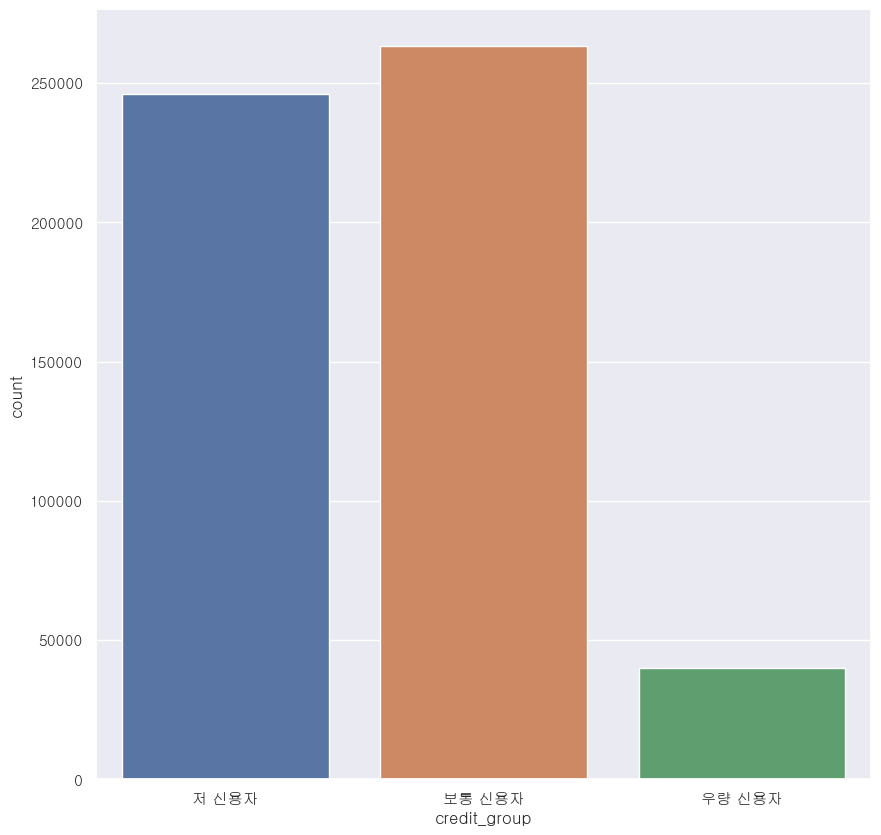

In [8]:
sns.countplot(data = credit_group_result, x='credit_group')

In [11]:
desired_amount_bins = [0, 1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, df['desired_amount'].max()+1]
# desired_amount_group_names = [0, 1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
desired_amount_group_names = ['없음', '1천만\n미만', '1천만대', '2천만대', '3천만대', '4천만대', '5천만대',
                              '6천만대', '7천만대', '8천만대', '9천만대', '1억\n이상']

desired_amount_result = pd.cut(df['desired_amount']/10000, desired_amount_bins, right = False, labels = desired_amount_group_names)
desired_amount_result = pd.DataFrame(desired_amount_result)
desired_amount_result

,desired_amount
3,2천만대
5,1천만대
6,1천만대
11,1천만대
12,1천만대
...,...
9875655,1천만대
9875656,1천만\n미만
9875657,2천만대
9875658,3천만대


<AxesSubplot: xlabel='desired_amount', ylabel='count'>

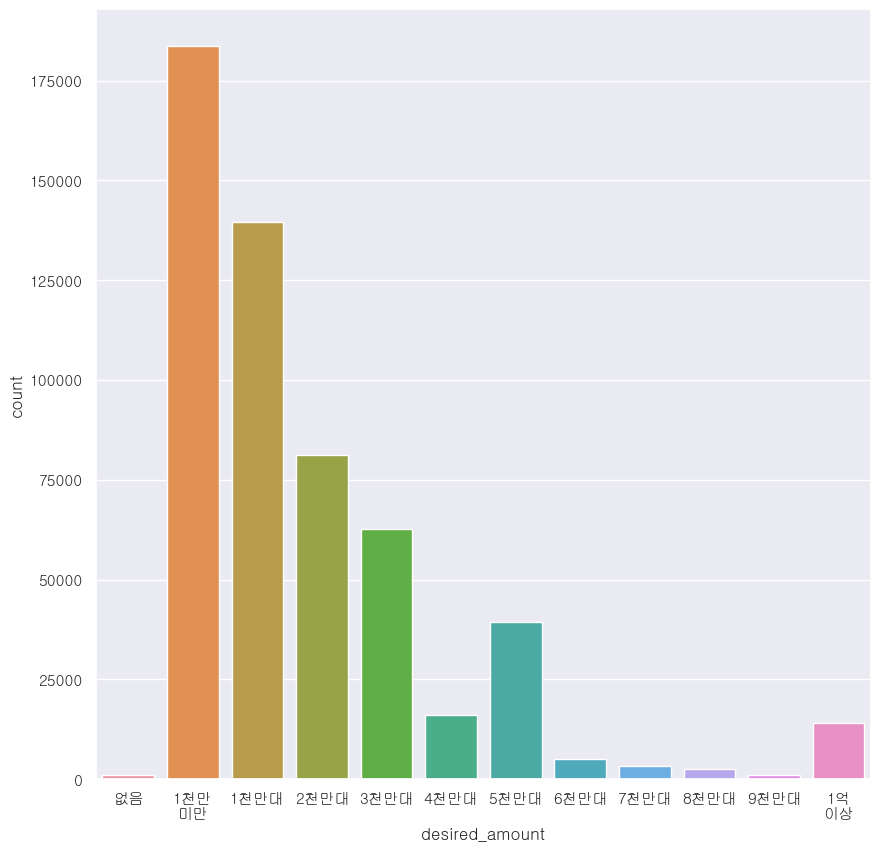

In [12]:
sns.countplot(data = desired_amount_result, x='desired_amount')

In [13]:
yearly_income_bins = [0, 1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, df['yearly_income'].max()+1]
# yearly_income_group_names = [0, 1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
yearly_income_group_names = ['없음', '1천만\n미만', '1천만대', '2천만대', '3천만대', '4천만대', '5천만대',
                             '6천만대', '7천만대', '8천만대', '9천만대', '1억\n이상']

yearly_income_result = pd.cut(df['yearly_income']/10000, yearly_income_bins, right = False, labels = yearly_income_group_names)
yearly_income_result = pd.DataFrame(yearly_income_result)
yearly_income_result

,yearly_income
3,7천만대
5,7천만대
6,7천만대
11,7천만대
12,7천만대
...,...
9875655,2천만대
9875656,2천만대
9875657,없음
9875658,없음


<AxesSubplot: xlabel='yearly_income', ylabel='count'>

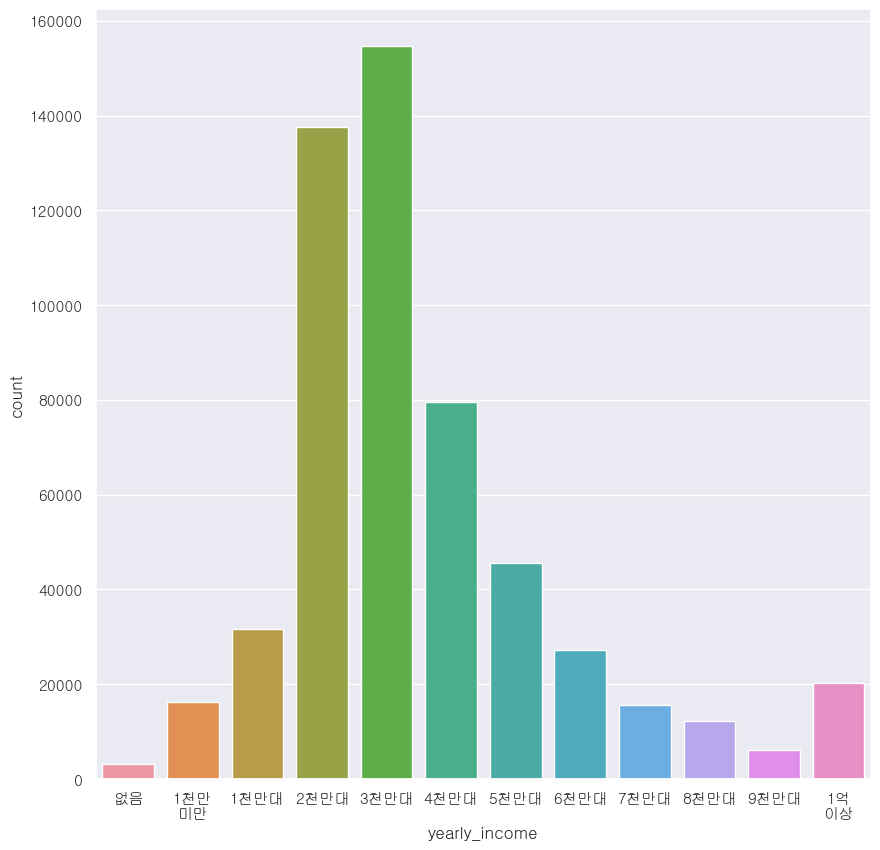

In [14]:
sns.countplot(data = yearly_income_result, x='yearly_income')

In [15]:
age_bins = [20, 30, 40, 50, 60, 70, 999]
# age_group_names = [20, 30, 40, 50, 60, 70]
age_group_names = ['20대', '30대', '40대', '50대', '60대', '70대 이상']

age_result = pd.cut(df['age'], age_bins, right = False, labels = age_group_names)
age_result = pd.DataFrame(age_result)
age_result

,age
3,40대
5,40대
6,40대
11,40대
12,40대
...,...
9875655,50대
9875656,30대
9875657,30대
9875658,30대


<AxesSubplot: xlabel='age', ylabel='count'>

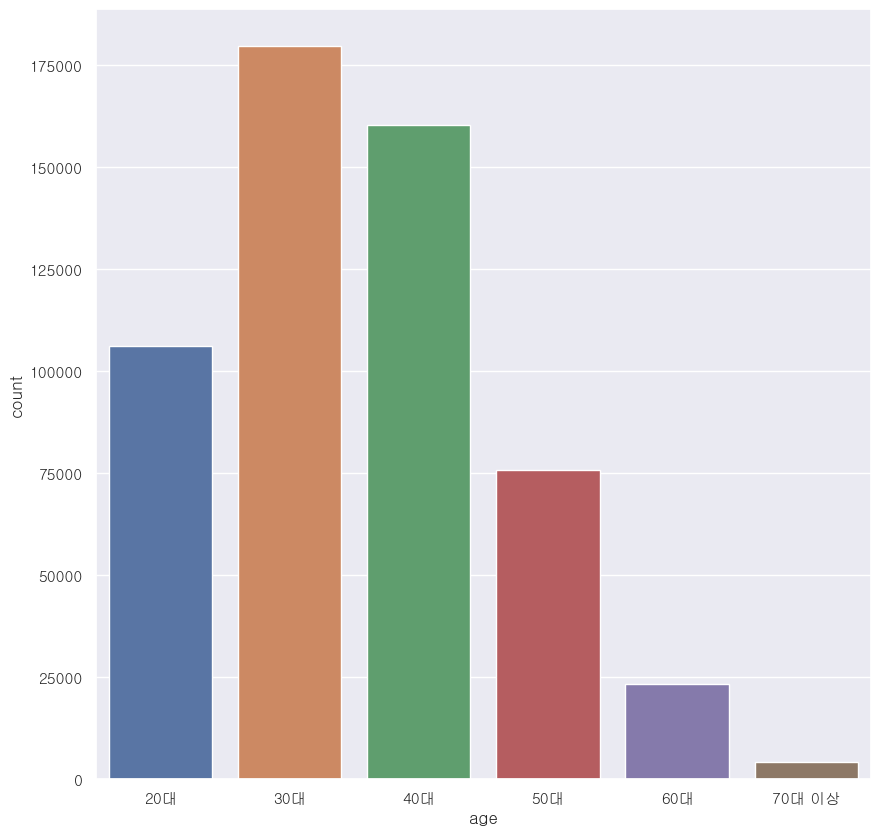

In [16]:
sns.countplot(data = age_result, x='age')

In [17]:
existing_loan_amt_bins = [0, 1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 30000, df['yearly_income'].max()+1]
# existing_loan_amt_group_names = [0, 1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 30000]
existing_loan_amt_group_names = ['없음', '1천만\n미만', '1천\n만대', '2천\n만대', '3천\n만대', '4천\n만대', '5천\n만대',
                                 '6천\n만대', '7천\n만대', '8천\n만대', '9천\n만대', '1억\n~\n1억5천\n미만', 
                                 '1억5천\n~\n2억\n미만', '2억\n대', '3억\n이상']

existing_loan_amt_result = pd.cut(df['existing_loan_amt']/10000, existing_loan_amt_bins, right = False, labels = existing_loan_amt_group_names)
existing_loan_amt_result = pd.DataFrame(existing_loan_amt_result)
existing_loan_amt_result

,existing_loan_amt
3,1억\n~\n1억5천\n미만
5,1억\n~\n1억5천\n미만
6,1억\n~\n1억5천\n미만
11,1억\n~\n1억5천\n미만
12,1억\n~\n1억5천\n미만
...,...
9875655,2천\n만대
9875656,없음
9875657,2천\n만대
9875658,2천\n만대


<AxesSubplot: xlabel='existing_loan_amt', ylabel='count'>

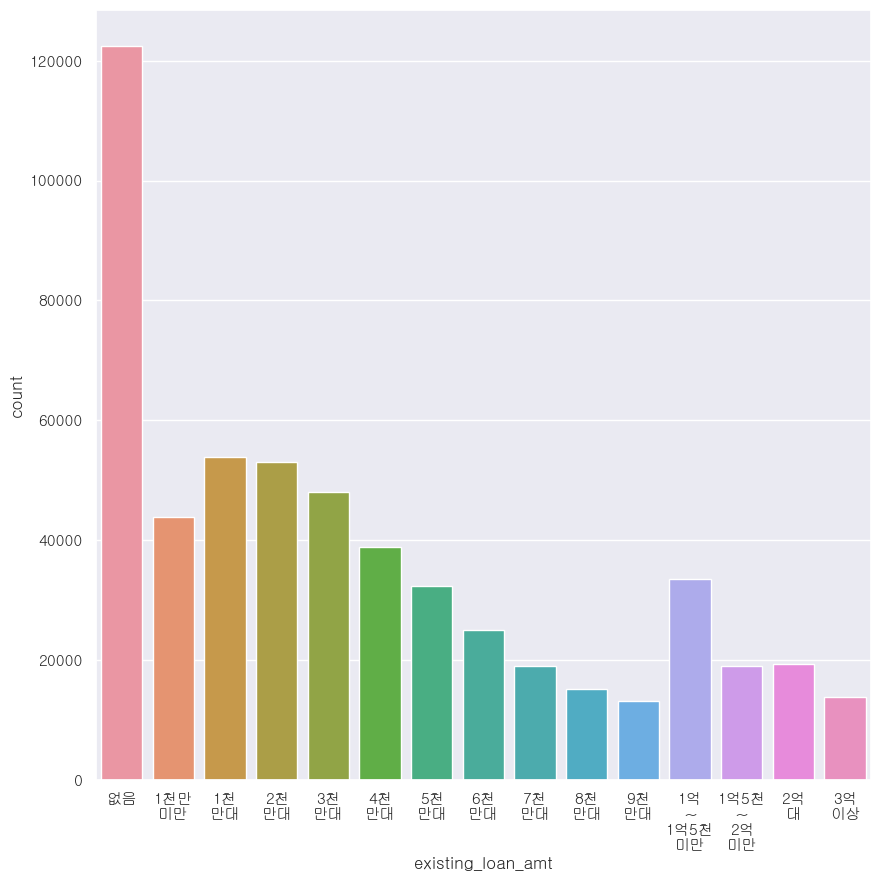

In [18]:
sns.countplot(data = existing_loan_amt_result, x='existing_loan_amt')

In [19]:
income_type_result = df[['income_type']]

income_type_result = income_type_result.replace({'income_type' : 1}, '직장가입자\n4대보험유')
income_type_result = income_type_result.replace({'income_type' : 2}, '직장가입자\n4대보험무')
income_type_result = income_type_result.replace({'income_type' : 3}, '개인사업자')
income_type_result = income_type_result.replace({'income_type' : 4}, '전문직')
income_type_result = income_type_result.replace({'income_type' : 5}, '프리랜서')
income_type_result = income_type_result.replace({'income_type' : 6}, '기타소득')
                                                 
income_type_result

,income_type
3,직장가입자\n4대보험유
5,직장가입자\n4대보험유
6,직장가입자\n4대보험유
11,직장가입자\n4대보험유
12,직장가입자\n4대보험유
...,...
9875655,기타소득
9875656,프리랜서
9875657,기타소득
9875658,기타소득


<AxesSubplot: xlabel='income_type', ylabel='count'>

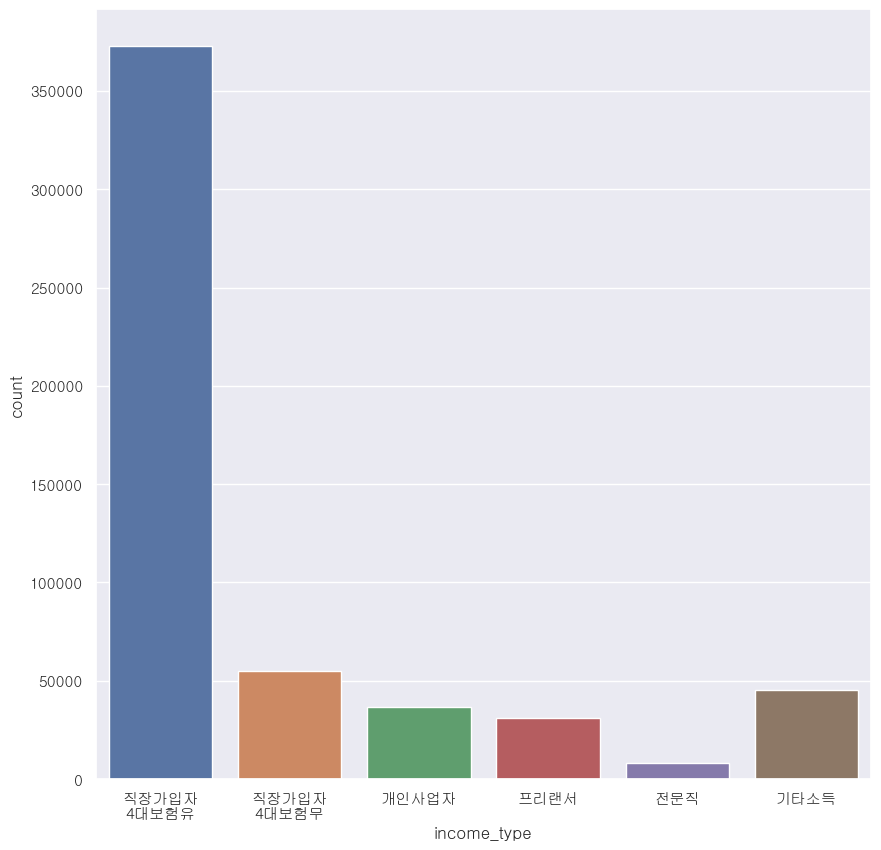

In [27]:
sns.countplot(data = income_type_result, x='income_type',
              order = ['직장가입자\n4대보험유', '직장가입자\n4대보험무', '개인사업자', '프리랜서', '전문직', '기타소득'])

In [21]:
existing_loan_cnt_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 999]
# existing_loan_cnt_group_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
existing_loan_cnt_group_names = ['0개', '1개', '2개', '3개', '4개', '5개', '6개', '7개',
                                 '8개', '9개', '10개\n~\n14개', '15개\n~\n19개', '20개\n이상']

existing_loan_cnt_result = pd.cut(df['existing_loan_cnt'], existing_loan_cnt_bins, right = False, labels = existing_loan_cnt_group_names)
existing_loan_cnt_result = pd.DataFrame(existing_loan_cnt_result)
existing_loan_cnt_result

,existing_loan_cnt
3,7개
5,7개
6,7개
11,7개
12,7개
...,...
9875655,4개
9875656,0개
9875657,4개
9875658,4개


<AxesSubplot: xlabel='existing_loan_cnt', ylabel='count'>

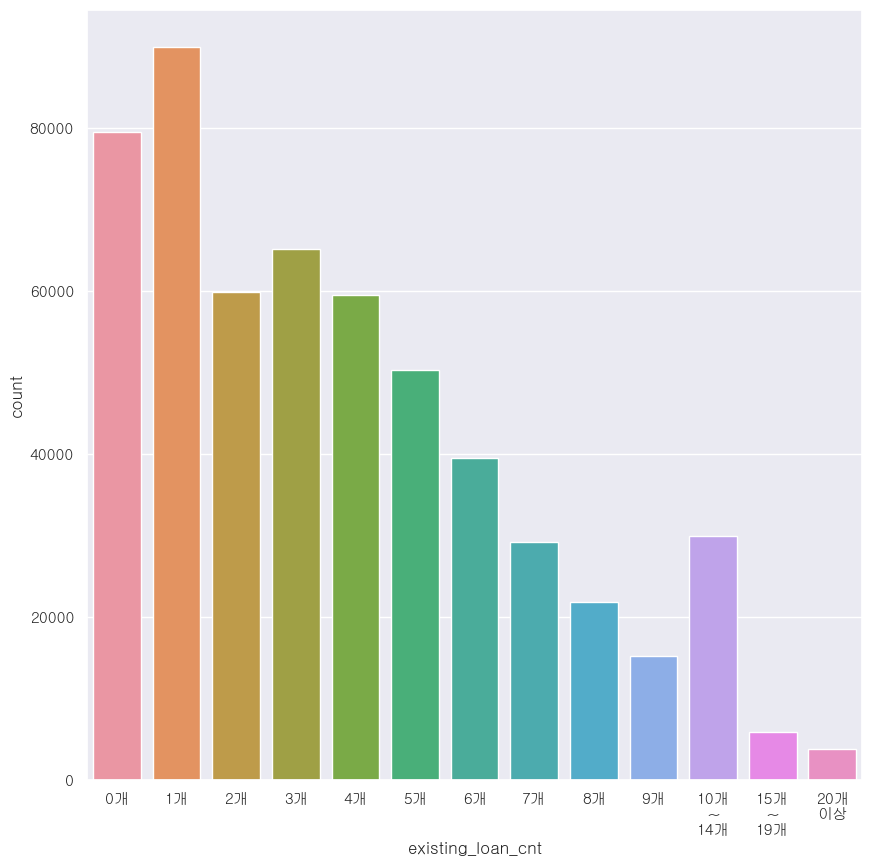

In [22]:
sns.countplot(data = existing_loan_cnt_result, x='existing_loan_cnt')

In [23]:
months_of_service_bins = [1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 241, 361, 9999]
# months_of_service_group_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]
months_of_service_group_names = ['1년차', '2년차', '3년차', '4년차', '5년차', '6년차', '7년차', '8년차', '9년차', '1n년차', '2n년차', '30년\n이상']

months_of_service_result = pd.cut(df['months_of_service'], months_of_service_bins, right = False, labels = months_of_service_group_names)
months_of_service_result = pd.DataFrame(months_of_service_result)
months_of_service_result

,months_of_service
3,4년차
5,4년차
6,4년차
11,4년차
12,4년차
...,...
9875655,1년차
9875656,1년차
9875657,5년차
9875658,2년차


<AxesSubplot: xlabel='months_of_service', ylabel='count'>

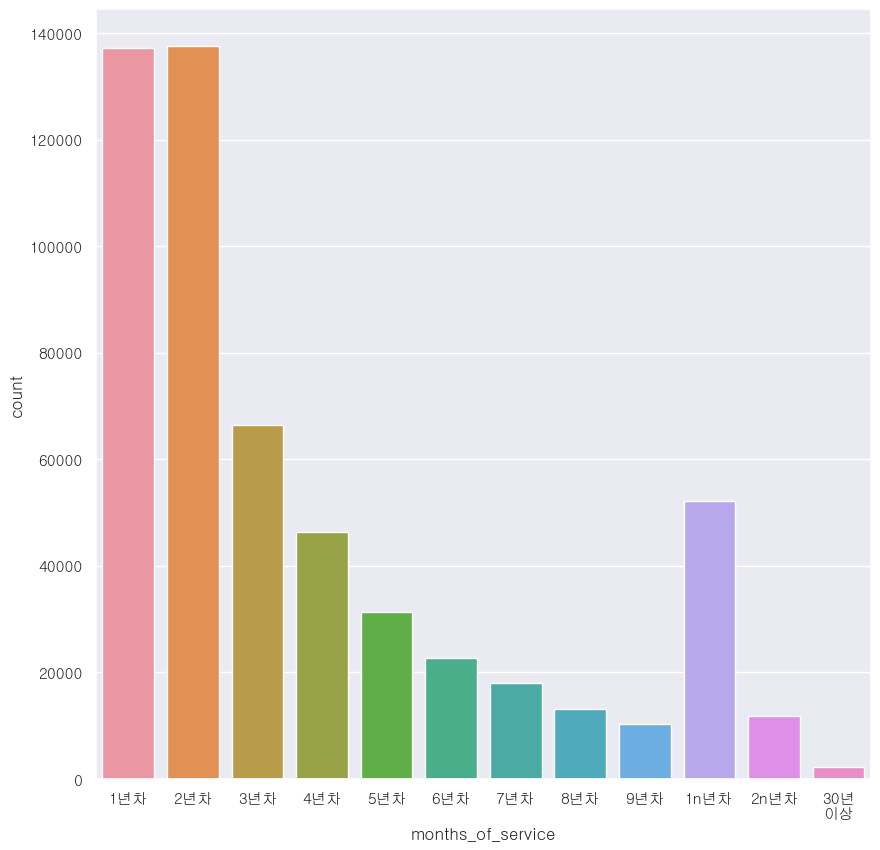

In [24]:
sns.countplot(data = months_of_service_result, x='months_of_service')

In [25]:
purpose_result = df[['purpose']]

purpose_result = purpose_result.replace({'purpose' : 1}, '생활비')
purpose_result = purpose_result.replace({'purpose' : 2}, '대환대출')
purpose_result = purpose_result.replace({'purpose' : 3}, '사업자금')
purpose_result = purpose_result.replace({'purpose' : 4}, '주택구입')
purpose_result = purpose_result.replace({'purpose' : 5}, '전월세보증금')
purpose_result = purpose_result.replace({'purpose' : 6}, '투자')
purpose_result = purpose_result.replace({'purpose' : 7}, '자동차구입')
purpose_result = purpose_result.replace({'purpose' : 8}, '기타')

purpose_result

,purpose
3,생활비
5,생활비
6,생활비
11,생활비
12,생활비
...,...
9875655,생활비
9875656,생활비
9875657,대환대출
9875658,대환대출


<AxesSubplot: xlabel='purpose', ylabel='count'>

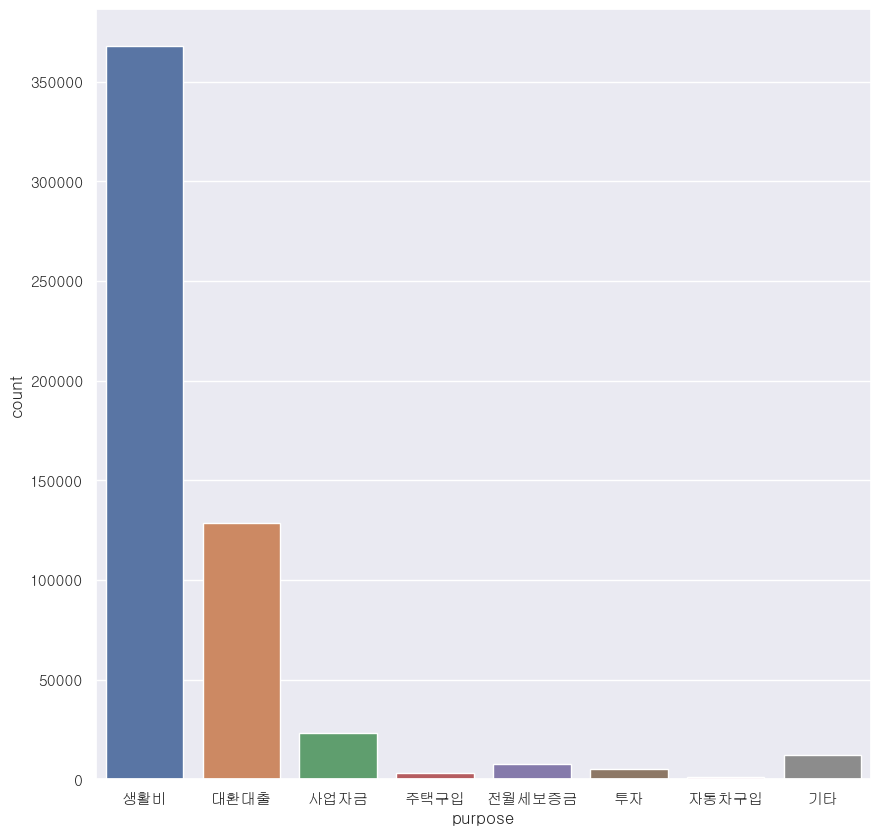

In [28]:
sns.countplot(data = purpose_result, x='purpose',
              order = ['생활비', '대환대출', '사업자금', '주택구입', '전월세보증금', '투자', '자동차구입', '기타'])